# 08 Instrumental Vairables

In [6]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
from scipy import stats
from matplotlib import style
import seaborn as sns
from matplotlib import pyplot as plt
import statsmodels.formula.api as smf
import graphviz as gr
from linearmodels.iv import IV2SLS


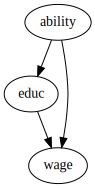

In [8]:
g = gr.Digraph()

g.edge("ability", "educ")
g.edge("ability", "wage")
g.edge("educ", "wage")
g

- 위의 경우에는 `ability`를 regression model의 변수로 넣어서 confounder의 영향을 없애면 된다.
- 하지만 그게 어려운 경우도 존재한다. (ability를 어떻게 측정? 등등)
- 이럴 때, IV를 사용할 수 있다.

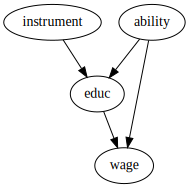

In [9]:
g = gr.Digraph()

g.edge("ability", "educ")
g.edge("ability", "wage")
g.edge("educ", "wage")
g.edge("instrument", "educ")
g

- IV은 오직 treatment를 cause하고 오직 treatment를 통해서만 outcome과 correlated되어 있다.
- $Z$: IV, $T$: treatment, $W$: confounder 라고 하자. 하지만 $W$는 현재 모르는 상황인 것이다. 그래서 IV을 이용하여 causality를 구하면:

$$Y_i = \beta_0 + \kappa \ T_i + \pmb{\beta}W_i + u_i$$

$$Cov(Z, Y) = Cov(Z, \beta_0 + \kappa \ T_i + \pmb{\beta}W_i + u_i) \\ = \kappa Cov(Z,T)$$

$$\kappa = \dfrac{Cov(Y_i, Z_i)}{Cov(T_i, Z_i)}$$

$$\therefore \kappa = \dfrac{Cov(Y_i, Z_i)/V(Z_i)}{Cov(T_i, Z_i)/V(Z_i)} = \dfrac{\text{Reduced Form}}{\text{1st Stage}}$$

- 분모, 분자 모두 regression coefficient이다.
- 만약에 IV가 binary이면 아래의 식이고 Wald Estimator라고 부른다.

$$\kappa = \dfrac{E[Y|Z=1]-E[Y|Z=0]}{E[T|Z=1]-E[T|Z=0]}$$





## Quarter of Birth and the Effect of Education on Wage

- https://matheusfacure.github.io/python-causality-handbook/08-Instrumental-Variables.html